# Aerofit Analysis - By Bhagyashree Sharma

## Importing basic libararies for analysis of data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

## Downloading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\bsbha\OneDrive\Desktop\Scaler\Sacler Case Studies\Case Study 3 - Aerolift_treadmill\aerolift_treadmill.csv")

### Now that the data has been downloaded, let's do some basic analysis to find out what does our dataset look like, does it contain any missing values and how's the data is distributed overall.  Let's go...!

In [3]:
df.shape

(180, 9)

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### From the above two-three lines of code we can see that the data contains overall 180 rows and 9 columns - the most important thing is - our data does not contain any null values as can be seen that every column has 180 non-null values which implies there are no nulls. So, we need not worry about filling the null values. Let's go ahead and do some basic ananlysis on how our data is spread over all - the distribution, outliers etc.

### Let us first find out how many products are there that Aerofit is selling in our dataset i.e. the 'Product' column.

In [6]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

### There are basically three products (treadmills) which are being sold by Aerofit. Out of which the KP281(the cheapest in terms of cost) is clearly our highest selling product followed by KP481 (second cheapest in terms of cost) and then comes the most expensive one - KP781 - least sold among the three kinds.

### Let us keep analysing the data..!

In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [9]:
df['Gender'].value_counts(normalize=True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

### We can see a key factor here - in the dataset provided - there are around 58% Male Buyers and 42% Female Buyers. 

### Let us analyse other categorical columns also to see if the dataset needs some kind of cleaning.

In [10]:
df['Education'].value_counts(normalize=True)*100

16    47.222222
14    30.555556
18    12.777778
15     2.777778
13     2.777778
21     1.666667
12     1.666667
20     0.555556
Name: Education, dtype: float64

### The above output implies that majority of the buyers are graduates - roughly 50%.

###### - 

In [11]:
df['Usage'].value_counts(normalize=True)*100

3    38.333333
4    28.888889
2    18.333333
5     9.444444
6     3.888889
7     1.111111
Name: Usage, dtype: float64

### This indicates that most of the buyers use their treadmills roughly half of the week (2,3 and 4 days) and very few make it through the week (sad!!)

###### -

In [12]:
df['MaritalStatus'].value_counts(normalize=True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

In [13]:
df.groupby('Gender')['MaritalStatus'].value_counts(normalize=True)*100

Gender  MaritalStatus
Female  Partnered        60.526316
        Single           39.473684
Male    Partnered        58.653846
        Single           41.346154
Name: MaritalStatus, dtype: float64

### In the dataset given, we can see that there are more parterenerd people present and in that 61% of female buyers are partnered as opposed to 59% of male buyers.

###### -

In [14]:
Fitness = df['Fitness'].value_counts().to_frame()
Fitness.index.name = 'Level of Fitness'
Fitness

,Fitness
Level of Fitness,
3,97
5,31
2,26
4,24
1,2


### The data above doesn't look very informative with just numbers - since our end user might not be aware of what 1,2,3,4,5 represent in terms of fitness level. Thus we can convert this categorical column into proper categories that could be well understood by the user viz. 1 - Poor , 2 - Somewhat Poor , 3 - Good , 4 - Very Good , 5 - Excellent. This way our data is comprehensible.

In [15]:
df['Fitness'].replace([1,2,3,4,5],['Poor', 'Somewhat poor','Good','Very Good', 'Excellent' ], inplace=True)

In [16]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,Very Good,29562,112
1,KP281,19,Male,15,Single,2,Good,31836,75
2,KP281,19,Female,14,Partnered,4,Good,30699,66
3,KP281,19,Male,12,Single,3,Good,32973,85
4,KP281,20,Male,13,Partnered,4,Somewhat poor,35247,47


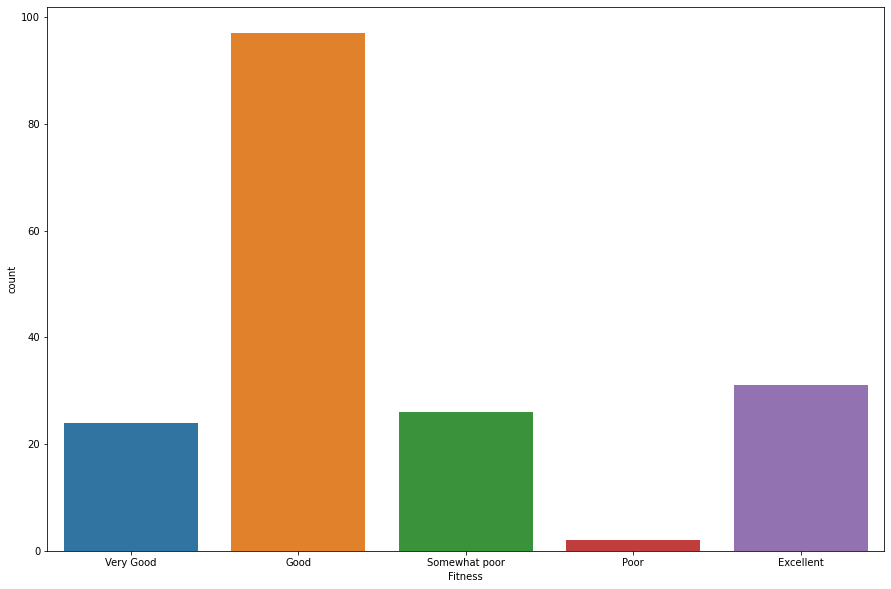

In [17]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='Fitness',data=df)
plt.show()

In [18]:
df['Fitness'].value_counts(normalize=True)*100

Good             53.888889
Excellent        17.222222
Somewhat poor    14.444444
Very Good        13.333333
Poor              1.111111
Name: Fitness, dtype: float64

### Ok, so now, from the above plot we can see that the data has become more user-friendly - you can understand how the buyers have rated themselves in terms of their fitness and more than half of the buyers in the dataset say that they have 'Good' fitness meaning they have rated themselves as a 2.

### Let us visualize other categorical columns as well to understand their overall distribution in our dataset.

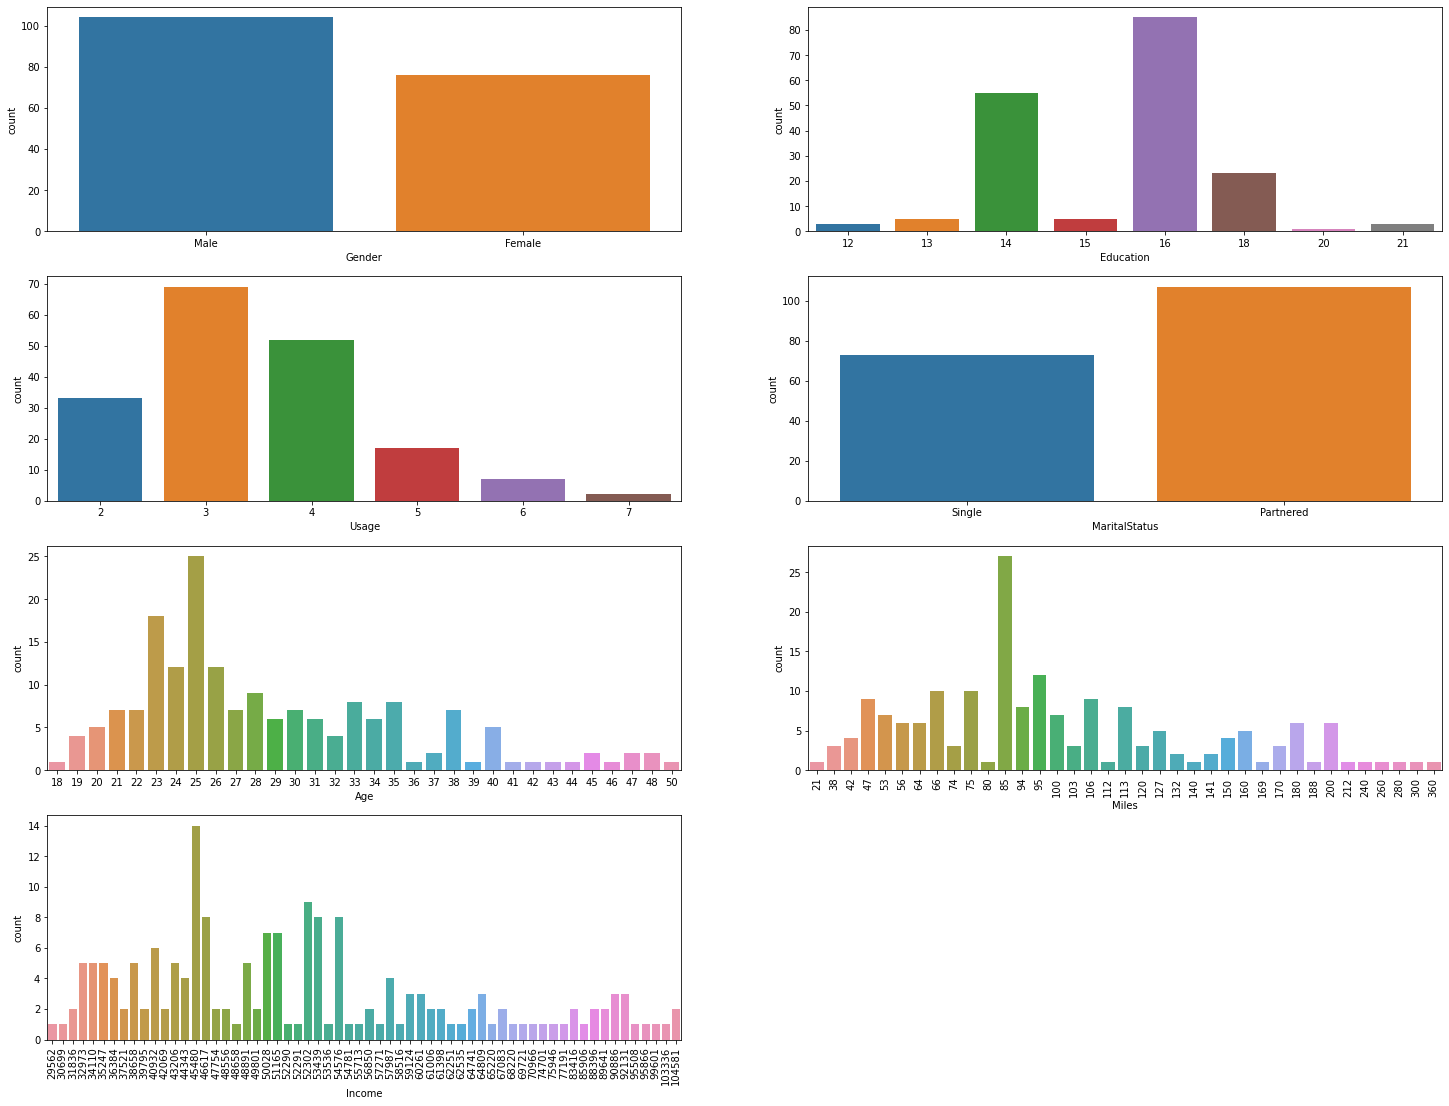

In [19]:
fig = plt.figure(figsize=(25,19))
plt.subplot(4,2,1)
sns.countplot(x='Gender',data=df)

plt.subplot(4,2,2)
sns.countplot(x='Education',data=df)

plt.subplot(4,2,3)
sns.countplot(x='Usage',data=df)

plt.subplot(4,2,4)
sns.countplot(x='MaritalStatus',data=df)

plt.subplot(4,2,5)
sns.countplot(x='Age',data=df)

plt.subplot(4,2,6)
sns.countplot(x='Miles',data=df)
plt.xticks(rotation=90)

plt.subplot(4,2,7)
sns.countplot(x='Income',data=df)
plt.xticks(rotation=90)


plt.show()

### Income can be one of the driving factors in buying anything in the world. In the above plot, the distribution of income is not very clearly distinguishable. Let's do a separate analysis on income for our better understanding.

In [20]:
df['Income'].value_counts().sort_values()

54781     1
77191     1
57271     1
62251     1
48658     1
         ..
46617     8
54576     8
53439     8
52302     9
45480    14
Name: Income, Length: 62, dtype: int64

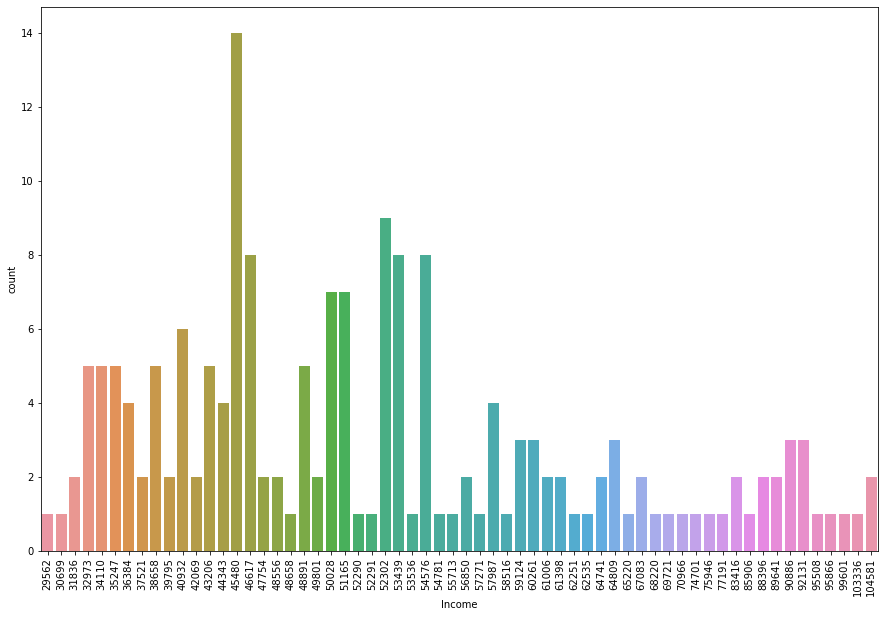

In [21]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='Income',data=df)
plt.xticks(rotation=90)
plt.show()

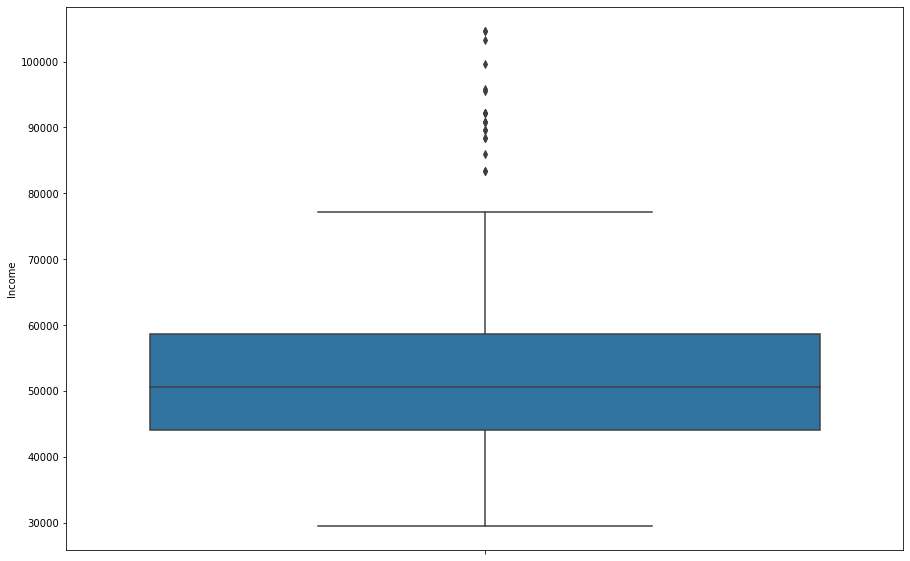

In [22]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(y='Income',data=df)
plt.show()

In [23]:
df['Income'].mean(), df['Income'].median()

(53719.57777777778, 50596.5)

### From the above plot it can be seen that median salary of this dataset is around 51000 dollors and mean salary is 54000 dollors - the difference in mean and median salaries can be attributed to the fact that we have a lot of outliers after salary of 78000 dollors as observed from the box plot. These outliers can be avoided but we shouldn't, as this can weigh in on the fact that who might purchase which product. We can thus divide our salary range from the above plots for better analysis - [0, 50000,75000,100000,.....] as [low, medium, high, Extremely well] i.e. persons earning upto 50000 dollors belong to lower income slab, from 50000 to 75000 belong to medium income slab, from 75000 to 100000 belong to high earning slab and beyond 100000 belong to extremely well earning slab. 

### This division of salary in various classes / slab here is subject to change based on availability of proper demographics. Hence it is advised to include the region of purchase to make better analysis on income and product buying relationship. Due to this very important datafield missing in the dataset the ultimate analysis might differ from actual reality to some extent. 

### Nevertheless we are given this data and we are going to use this for analysis purpose.

### For getting this new range of income column, let us actually add a new column without hampering the original column as both of them might be useful in creating a good customer profile at later stages in our analysis.

In [24]:
conditions = [
    (df['Income'] <= 50000),
    (df['Income'] > 50000) & (df['Income'] <= 75000),
    (df['Income'] > 75000) & (df['Income'] <= 100000),
    (df['Income'] > 100000)
    ]
values = ['Low', 'Medium', 'High', 'Extremely Well']
df['Income Range'] = np.select(conditions,values)

In [25]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Range
0,KP281,18,Male,14,Single,3,Very Good,29562,112,Low
1,KP281,19,Male,15,Single,2,Good,31836,75,Low
2,KP281,19,Female,14,Partnered,4,Good,30699,66,Low
3,KP281,19,Male,12,Single,3,Good,32973,85,Low
4,KP281,20,Male,13,Partnered,4,Somewhat poor,35247,47,Low


### Now, after adding this new column Income Range - the new dataset looks like above, giving us an insight on various salary ranges. Let's find out the value count of these ranges.

In [26]:
df['Income Range'].value_counts()

Low               83
Medium            76
High              18
Extremely Well     3
Name: Income Range, dtype: int64

### This shows that we are provided with a dataset which has buyers from low and medium earning slab in more numbers than buyers earning extremely well. Aerofit can look into that and maybe add a more customized product which can be bought by people earning extremely well.

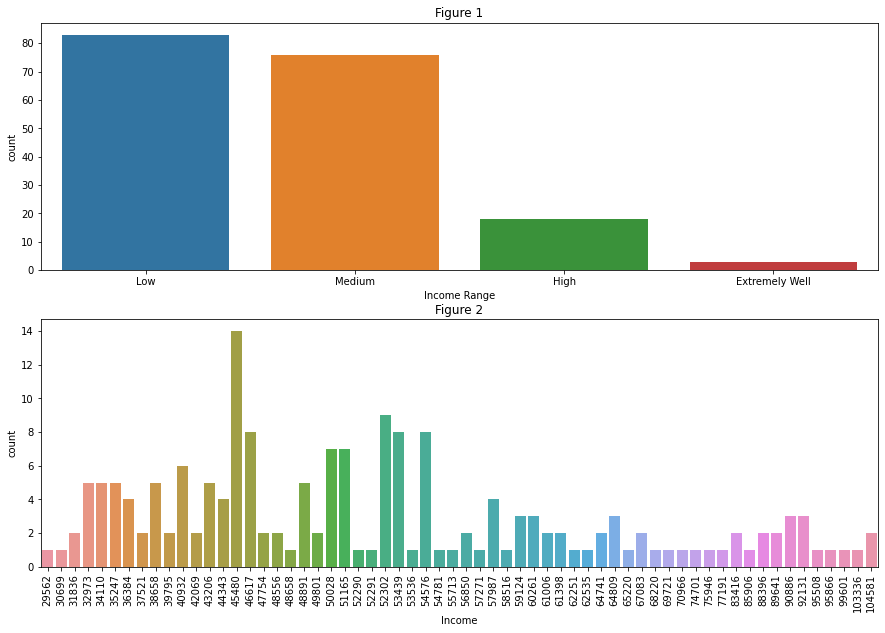

In [27]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.countplot(x='Income Range',data=df)
plt.title('Figure 1')

plt.subplot(2,1,2)
sns.countplot(x='Income',data=df)
plt.xticks(rotation=90)
plt.title('Figure 2')

plt.show()

### Above two figures show the distribution of Income. Obviously Figure 1 gives an overall insight on what could be the bifurcation of salary and Figure 2 gives overall picture of the database. Both good in their own terms.

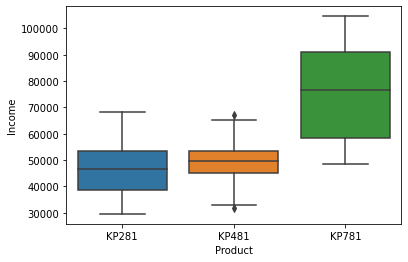

In [28]:
sns.boxplot(y='Income',x ='Product', data=df)

### The above box plot indicates a general trend - the higher the salary the higher the chances of buying the most expensive product.

###### -

### Age also plays an important role in activity of a person. Let's find out how the age factor of the buyers look like.

In [29]:
df['Age'].value_counts().sort_values()

18     1
44     1
43     1
42     1
41     1
39     1
36     1
50     1
46     1
47     2
48     2
45     2
37     2
19     4
32     4
20     5
40     5
31     6
34     6
29     6
27     7
21     7
22     7
38     7
30     7
35     8
33     8
28     9
24    12
26    12
23    18
25    25
Name: Age, dtype: int64

### Majority of the buyers appear to be falling in the range of 21-30 peaking at 25. We can create another column which can summarize this data for us.

In [30]:
conditions = [
    (df['Age'] <= 20),
    (df['Age'] > 20) & (df['Age'] <= 25),
    (df['Age'] > 25) & (df['Age'] <= 30),
    (df['Age'] > 30) & (df['Age'] <= 35),
    (df['Age'] > 35) & (df['Age'] <= 40),
    (df['Age'] > 40)
    ]
values = ['<=20', '21-25', '26-30', '31-35','36-40','>=41']
df['Age Range'] = np.select(conditions,values)

In [31]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Range,Age Range
0,KP281,18,Male,14,Single,3,Very Good,29562,112,Low,<=20
1,KP281,19,Male,15,Single,2,Good,31836,75,Low,<=20
2,KP281,19,Female,14,Partnered,4,Good,30699,66,Low,<=20
3,KP281,19,Male,12,Single,3,Good,32973,85,Low,<=20
4,KP281,20,Male,13,Partnered,4,Somewhat poor,35247,47,Low,<=20


In [32]:
df['Age Range'].value_counts()

21-25    69
26-30    41
31-35    32
36-40    16
>=41     12
<=20     10
Name: Age Range, dtype: int64

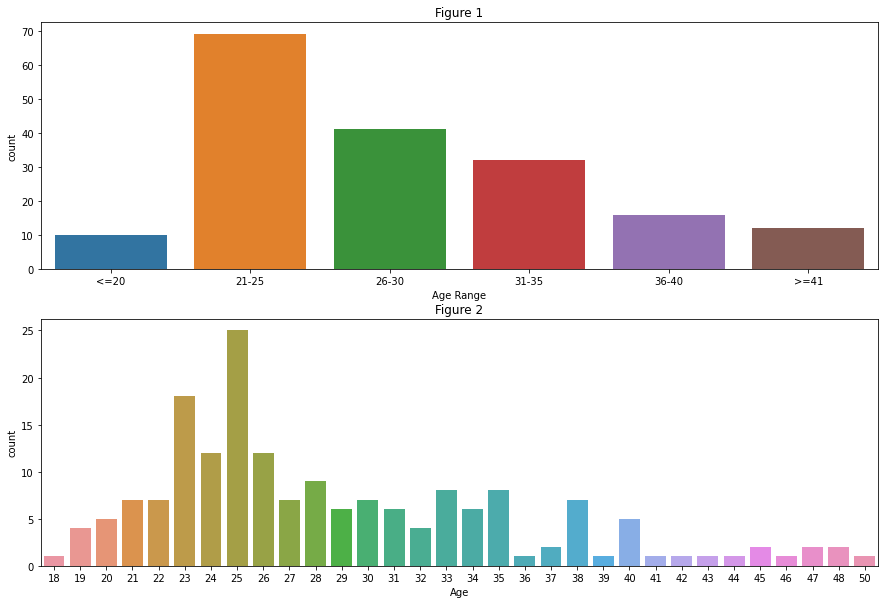

In [33]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.countplot(x='Age Range',data=df)
plt.title('Figure 1')

plt.subplot(2,1,2)
sns.countplot(x='Age',data=df)
plt.title('Figure 2')

plt.show()

In [34]:
df['Age'].mean(), df['Age'].median()

(28.788888888888888, 26.0)

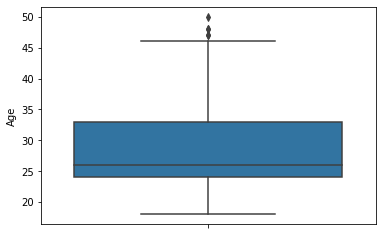

In [35]:
sns.boxplot(y=df['Age'],data=df)

### Mean and median differ to some extent because of the presence of the outliers as can be seen from the above box plot.

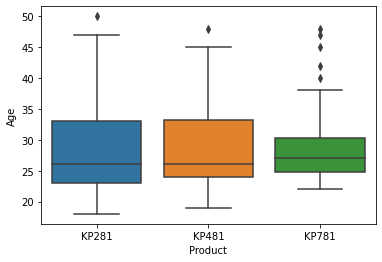

In [36]:
sns.boxplot(y='Age',x ='Product', data=df)

### It can be seen that median age for all the products is more or less similar. The difference is observed in the outliers here. 

### First of all, there are more outliers in the KP781 Product Category and only a few can be seen in other two product categories. Also, it can be observed that people with Age greater than 38-39 can be seen investing more in the expensive product. One of the reasons could be their income. Usually with age the income of a person tends to increase thus they can spend more on their well-being overall.

### Let us try to find out relationship between Age and Income for the three products.

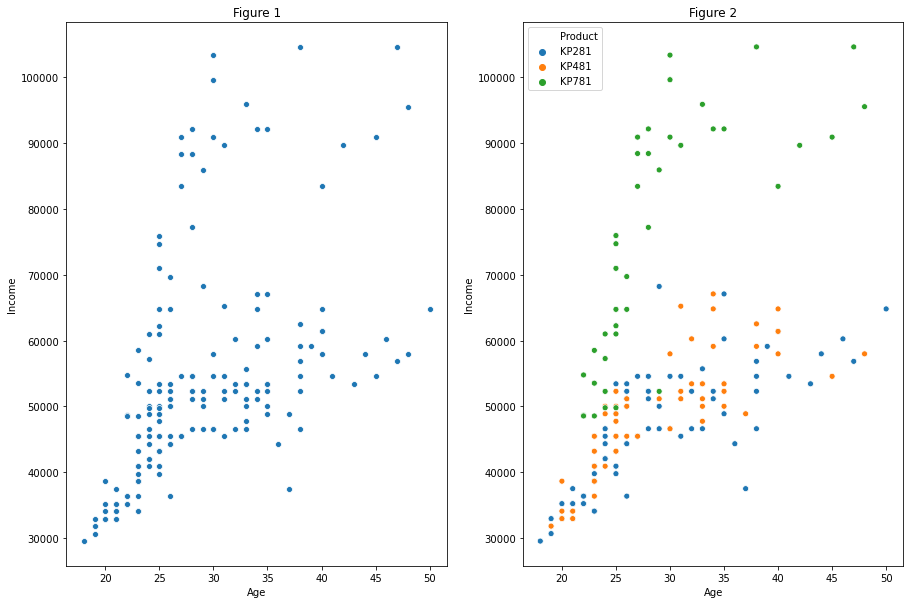

In [37]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(x='Age',y='Income', data=df)

plt.subplot(1,2,1)
sns.scatterplot(x='Age',y='Income', data=df)
plt.title('Figure 1')

plt.subplot(1,2,2)
sns.scatterplot(x='Age',y='Income',hue = 'Product', data=df)
plt.title('Figure 2')

plt.show()

### No apparent correlation can be found between Age and Income from the above plots per se. But again, one thing can be concluded that for age greater than 38-39, the inclination towards buying the premium treadmill KP781 is more.

### We saw how Age and Income are correlated (well - not so much). Can we see if there is a correlation between other categorical fields as well. Let us plot heatmaps and pairplots to find out.

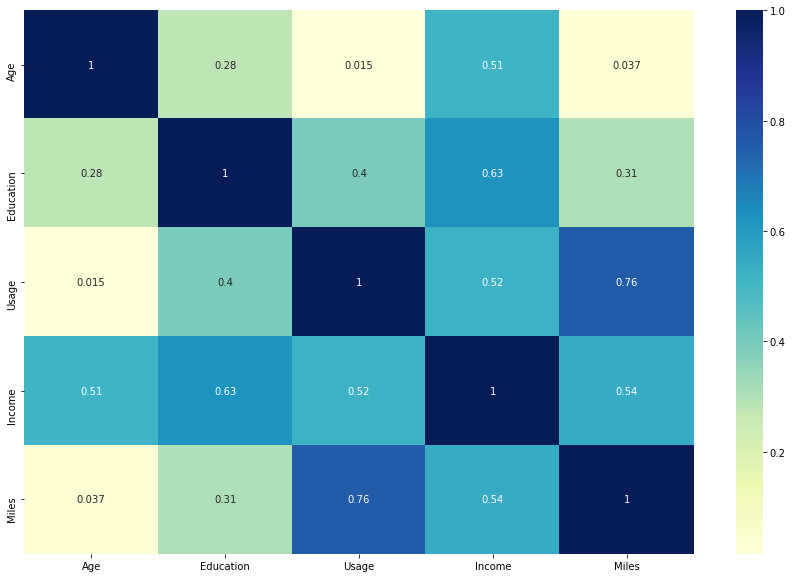

In [38]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

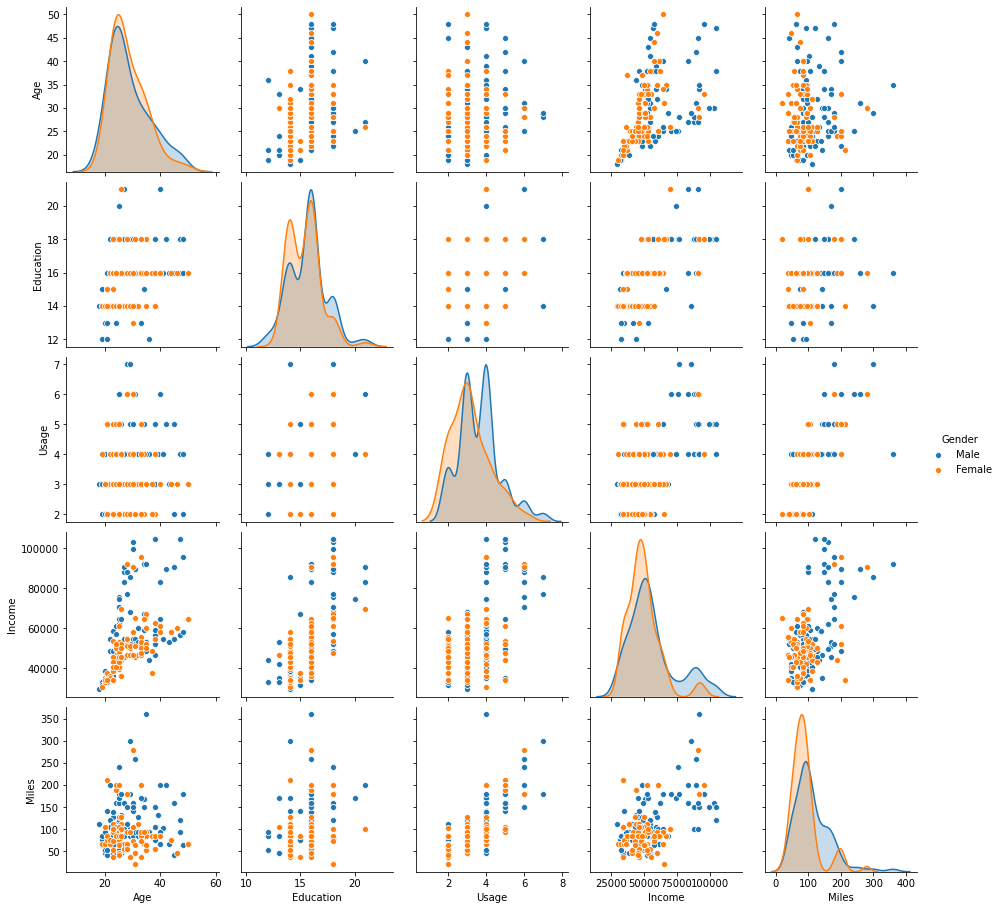

In [39]:
sns.pairplot(df,hue='Gender')
plt.show()

### We can deduce from the above plots that 
1. Usage and Miles are highly correlated.
2. Then Education and Income.
3. Then comes income and miles.
4. Then Income and usage.
5. And finally Income and Age.
6. For the same age - males are recorded to have more miles covered than females. 
7. For age limit greater than 39-40 - it is observed that less data of females is available.
8. A lot of female buyers are not high earning.

Rest all are not corrleated to the extent that is noticeable.

## Let's build some contingency tables to figure what is the probablity that a buyer will buy a specific product.

In [40]:
pd.crosstab(index=df['Gender'],columns=df.Product,normalize=True)*100

Product,KP281,KP481,KP781
Gender,,,
Female,22.222222,16.111111,3.888889
Male,22.222222,17.222222,18.333333


### Overall we can say that probability of a Male buying the premium quality product is 18.33% while same for the female is 3.89%. But for the other two products the probabilities don't vary much. This could again be attributed to the fact the a lot of female buyers don't earn much as per our dataset.

In [41]:
pd.crosstab(index=[df['Gender'],df['Income Range']],columns=df.Product,normalize=True)*100

Product                    KP281     KP481     KP781
Gender Income Range                                 
Female High             0.000000  0.000000  1.666667
       Low             14.444444  8.333333  0.000000
       Medium           7.777778  7.777778  2.222222
Male   Extremely Well   0.000000  0.000000  1.666667
       High             0.000000  0.000000  8.333333
       Low             12.222222  8.333333  2.777778
       Medium          10.000000  8.888889  5.555556

1. It can be seen that given a person has high income, the probability for a female to buy KP781 is 1.67% and for a male is 8.3%. 
2. There is no Female earning extremely well and probability of male buying KP781 given he is earning extremely well is 1.67%.
3. Overall it can be said that given a person is earning in low salary bracket, the probability of a female buying KP281 is 14.44% and for male it is 12.22%

In [42]:
pd.crosstab(index=[df.Gender,df.MaritalStatus],columns=df.Product,normalize=True)*100

Product                   KP281      KP481      KP781
Gender MaritalStatus                                 
Female Partnered      15.000000   8.333333   2.222222
       Single          7.222222   7.777778   1.666667
Male   Partnered      11.666667  11.666667  10.555556
       Single         10.555556   5.555556   7.777778

1. If a person is partnered then it can be seen that Female buyer has more probability of buying KP281 than Male while for the case of KP781 probability for Male is 10.55% against that of Female 2.22%.

In [43]:
Gender_age = pd.crosstab(index=[df['Gender'],df['Age Range']],columns=df.Product,normalize=True)*100
Gender_age

Product              KP281     KP481     KP781
Gender Age Range                              
Female 21-25      8.333333  6.111111  1.666667
       26-30      6.111111  2.777778  1.666667
       31-35      3.888889  4.444444  0.555556
       36-40      1.111111  2.222222  0.000000
       <=20       1.111111  0.555556  0.000000
       >=41       1.666667  0.000000  0.000000
Male   21-25      7.222222  7.222222  7.777778
       26-30      5.555556  1.111111  5.555556
       31-35      2.222222  5.000000  1.666667
       36-40      3.333333  1.111111  1.111111
       <=20       2.222222  1.666667  0.000000
       >=41       1.666667  1.111111  2.222222

1. Probabiliy for a Female aged between 21-25 to buy a KP281 is highest among any other class.
2. While probablity for a male buying a KP781 is highest for the age group 21-25.

In [44]:
pd.crosstab(index=[df.Gender,df.Fitness],columns=df.Product,normalize=True)*100

Product                   KP281      KP481      KP781
Gender Fitness                                       
Female Excellent       0.555556   0.000000   2.777778
       Good           14.444444  10.000000   0.555556
       Poor            0.000000   0.555556   0.000000
       Somewhat poor   5.555556   3.333333   0.000000
       Very Good       1.666667   2.222222   0.555556
Male   Excellent       0.555556   0.000000  13.333333
       Good           15.555556  11.666667   1.666667
       Poor            0.555556   0.000000   0.000000
       Somewhat poor   2.222222   3.333333   0.000000
       Very Good       3.333333   2.222222   3.333333

People who have rated themselves a 2 or good have more probability of buying a KP281. KP781 sees a 13.33% probability of a male buying a product who claims himself to be in excellent shape.

In [45]:
pd.crosstab(index=[df.Gender,df.Education],columns=df.Product,normalize=True)*100

Product               KP281     KP481     KP781
Gender Education                               
Female 13          0.000000  0.555556  0.000000
       14         10.000000  6.666667  0.000000
       15          1.111111  0.000000  0.000000
       16         10.555556  7.777778  1.111111
       18          0.555556  1.111111  2.222222
       21          0.000000  0.000000  0.555556
Male   12          1.111111  0.555556  0.000000
       13          1.666667  0.555556  0.000000
       14          6.666667  6.111111  1.111111
       15          1.111111  0.555556  0.000000
       16         11.111111  9.444444  7.222222
       18          0.555556  0.000000  8.333333
       20          0.000000  0.000000  0.555556
       21          0.000000  0.000000  1.111111

Highest probability of buying any product is seen in the persons with a good level of education.

# Recommendations - 

## 1. Add region / state / country of buyer to understand their income bifurcation in a better manner. 

## 2. Since majority of the buyers are between 21-30 age bracket - it is prudent to provide more deals on the products to attract them more.
1. This could be done by spending on more marketing of such products on their social media news feed - as such customers are usually more active across various platforms on social media.
2. This age bracket corresponds to what we call in today's world - millennials and Gen z. These people are more price concious. Thus a limited time offer or some loyalty programs made exclusively for them can attract more such buyers into investing in these products!

## 3. Attract customers over age 35 by more social media feed and offers - as they can buy the expensive product line giving more profit to the company overall.

## 4. We noticed that there are hardly any females above the age of 39-40 buying fitness products. Thus, it is advised that aerofit conducts a survey on why the number is so low and accordingly plan strategy to increase the number of female buyers. e.g. One reason of less number of female buyers could be their income.
This to increase sales among this group of females, aerofit can - 
1. Conduct drives on importance of cardio for females in their late 30s and early 40s.
2. More deals for females above 40 to attract more female customers especially on the cheap cost items - KP281 - This can encourage them to buy.
3. Arranging meet-ups for this class of females to break stereotypes against exercising, if any.
4. Ads / banners on importance of exercising at every age.

## 5. We observed the very common trend of all, the more the person's income the better the chances of them buying the most expensive product. It is therefore advised that Aerofit spends some time on survey of this demographic to get more such customers. This can be done by -
1. Collaborating with influencers that are famous among these high earning people. Endorsement of these influencers can broaden the product's credebility.
2. Hosting private events for such people where thwy can witness the product firsthand. This can give them a sense of exclusivity and a chance to aerofit to give them a direct thorough tour of products.
3. By assuring them that their data will remain safe, as a lot of high earners are worried about their data orivacy.
4. A limited edition product can be made for such buyers / customers

## 6. Aerofit can tap into emotions to encourage people to buy their products by advertising about a sense of accomplishment, overall satisfaction, happiness that comes after a good cardio.

## 7. Aerofit can create some sort of online forum where users are sharing their fitness journeys, tips etc. This can give its users a sense of belonging and sticking with aerofit for future purchases also thus helping in customer retention as well.